In [1]:
import cv2
import matplotlib.pyplot as plt

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 799.5, 301.5, -0.5),
 Text(0.5, 1.0, 'Ana Resim'))

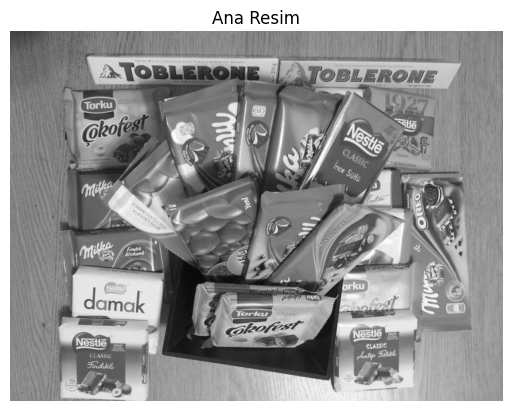

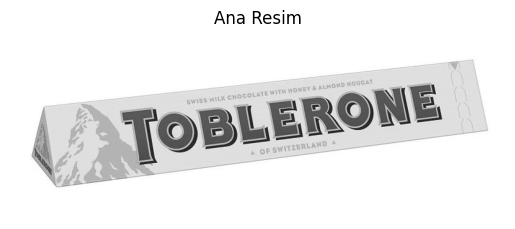

In [3]:
#ana resmi aktaralim
chos = cv2.imread("media/cikolata.jpg",0)
plt.figure(),plt.imshow(chos,cmap = "gray"),plt.axis("off"),plt.title("Ana Resim")
#bulacağımız nesneyi aktaralım
cho = cv2.imread("media/toblerone.jpg",0)
plt.figure(),plt.imshow(cho,cmap = "gray"),plt.axis("off"),plt.title("Ana Resim")



(<matplotlib.image.AxesImage at 0x1a34d479640>,
 (-0.5, 1535.5, 551.5, -0.5),
 Text(0.5, 1.0, 'ORB Eşleştirme'))

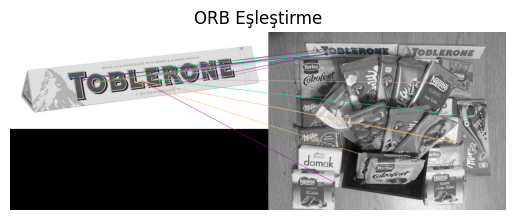

In [4]:
#orb tanımlayıcıyı oluşturalım
#kose kenar gibi nesneye ait ozellikler
orb = cv2.ORB_create()

#iki resimdeki anahtar noktaları ve tanımlayıcıları bulalım
kp1 , des1 = orb.detectAndCompute(cho,None)
kp2 , des2 = orb.detectAndCompute(chos,None)

#aynı nesneyi bulmak için bf eşleştiriciyi oluşturalım

bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches =bf.match(des1,des2)

#mesafeye göre sıralayalım
matches = sorted(matches,key=lambda x:x.distance)

#eslesen resimleri gorsellestirelim

plt.figure()
img_match = cv2.drawMatches(cho,kp1,chos,kp2,matches[:20],None,flags=2) #ilk 20 eslesmeyi alalım

plt.imshow(img_match), plt.axis("off"),plt.title("ORB Eşleştirme")

## sift tanimlayicisi

(<matplotlib.image.AxesImage at 0x1a34d492270>,
 (-0.5, 1535.5, 551.5, -0.5),
 Text(0.5, 1.0, 'SIFT Eşleştirme'))

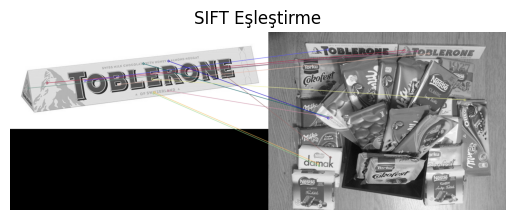

In [5]:
sift = cv2.xfeatures2d.SIFT_create()
#bf 
bf = cv2.BFMatcher()
#anahatar noktalarını ve tanımlayıcıları bulalım sift ile

kp1, des1 = sift.detectAndCompute(cho,None) 
kp2, des2 = sift.detectAndCompute(chos,None)

matches = bf.knnMatch(des1,des2,k=2) #knn eşleştirme 2li 

guzel_eslesme =[]   #en iyi eşleşmeleri alalım

for match1, match2 in matches:
    if match1.distance<0.75*match2.distance: #eger mesafe 0.75 den kucukse
        guzel_eslesme.append([match1])

plt.figure()
sift_matches = cv2.drawMatchesKnn(cho,kp1,chos,kp2,guzel_eslesme,None,flags=2) #en iyi eşleşmeleri alalım
plt.imshow(sift_matches),plt.axis("off"),plt.title("SIFT Eşleştirme")